**Importing standard libraries**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Reading a .csv file and visualizing top 10 records**


In [ ]:
data = pd.read_csv("/WineQT.csv")
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


**Classes of target value - Quality of data**

In [ ]:
set(data.quality)

{3, 4, 5, 6, 7, 8}

**Description of the given dataset**

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


**To check the missing values**

In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

**Correlation Matrix among all features of the dataset**

A correlation matrix is a table that shows the correlation coefficients between multiple variables. It is used to summarize the strength and direction of the linear relationship between pairs of variables.


A heatmap is a graphical representation of data where values are represented as colors in a 2D matrix. In your code, you used a heatmap to visualize the correlation matrix of your dataset. This allows you to quickly see which features are strongly correlated with each other

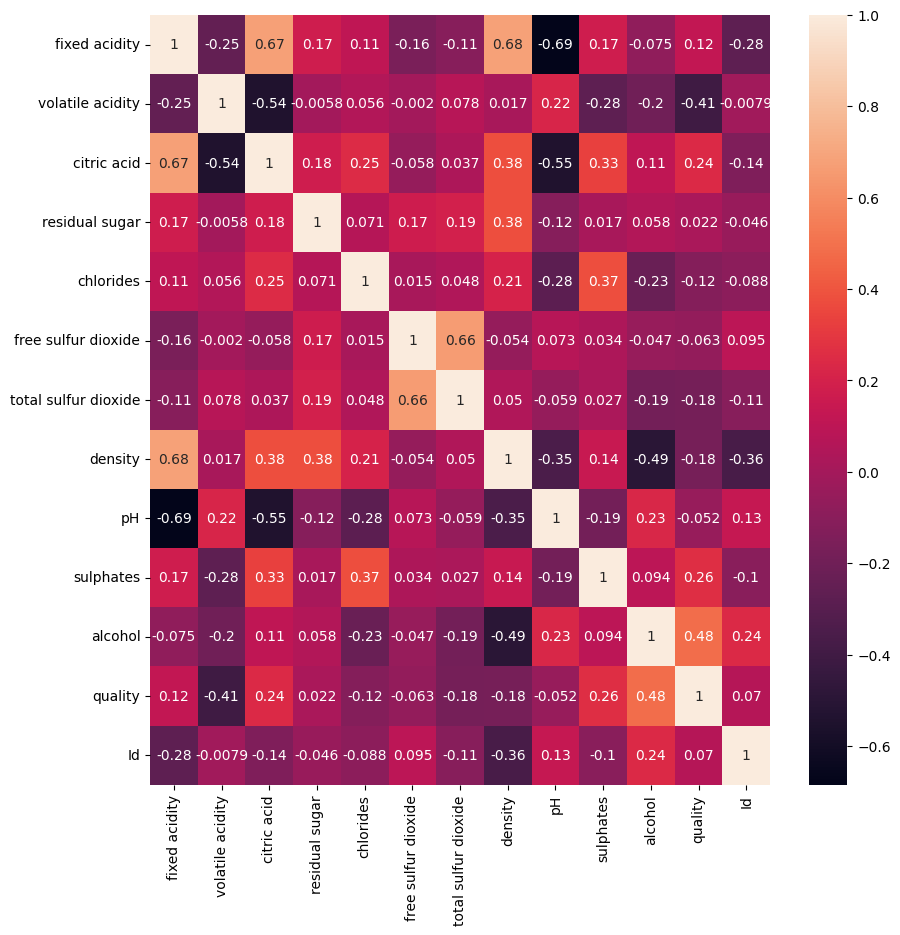

In [ ]:
plt.figure(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

**Finding of outliers using z-score**

A Z-score (also called a standard score) is a numerical measurement that describes a value's relationship to the mean of a group of values. It measures how many standard deviations a data point is away from the mean.

In [ ]:
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.521580          0.939332     1.365027        0.466421   0.231395   
1          0.292593          1.941813     1.365027        0.050060   0.234247   
2          0.292593          1.273492     1.161568        0.171289   0.107253   
3          1.653789          1.399789     1.483400        0.466421   0.252560   
4          0.521580          0.939332     1.365027        0.466421   0.231395   
...             ...               ...          ...             ...        ...   
1138       1.151292          0.118842     0.703785        0.171289   0.231395   
1139       0.865059          0.493785     0.958109        0.466421   0.400719   
1140       1.208538          0.382399     0.958109        0.392638   0.064922   
1141       1.380278          0.103932     0.856379        0.245072   0.527712   
1142       1.380278          0.633019     0.754650        0.392638   0.252560   

      free sulfur dioxide  

**If z > 3(Threshold) then it is an outlier**

In [ ]:
print(np.where(z>3))

(array([  11,   13,   30,   31,   32,   59,   61,   64,   75,   75,   87,
         88,   96,   98,  103,  103,  103,  103,  114,  115,  129,  142,
        161,  161,  167,  170,  171,  182,  182,  200,  230,  231,  240,
        244,  249,  272,  275,  275,  278,  278,  287,  289,  311,  311,
        324,  329,  339,  339,  348,  366,  368,  388,  397,  397,  399,
        399,  407,  419,  421,  424,  430,  452,  453,  454,  460,  460,
        462,  462,  462,  485,  490,  490,  493,  514,  520,  538,  557,
        572,  589,  597,  598,  627,  627,  644,  648,  654,  655,  690,
        714,  738,  738,  756,  760,  760,  761,  761,  787,  831,  871,
        890,  898,  898,  914,  915,  919,  922,  922,  931,  933,  934,
        934,  935,  965,  971,  973,  973,  975,  975, 1022, 1022, 1022,
       1046, 1051, 1051, 1053, 1053, 1055, 1066, 1074, 1111, 1111, 1111,
       1122]), array([ 9,  4,  4,  9,  8,  9,  9,  9,  4,  9,  1,  1, 10, 10,  2,  4,  8,
        9,  3,  3,  4,  1,  4,  9

**Removing those records whose value of z>3(outlier)**

In [ ]:
new_data = data[(z<3).all(axis=1)]
new_data.shape

(1041, 13)

In [ ]:
data.shape

(1143, 13)

**Information of the data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


**Visualising data using plot**

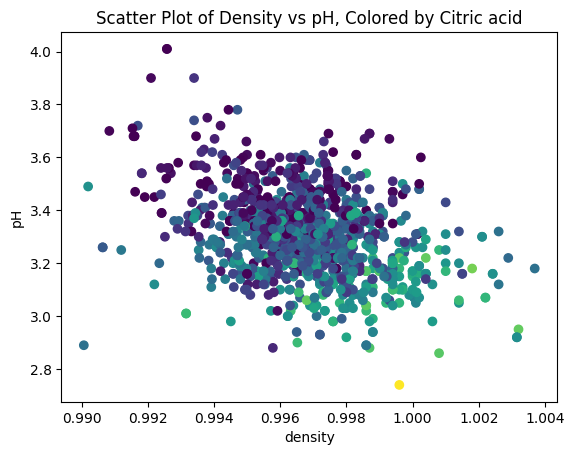

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x=data["density"], y=data["pH"], c=data["citric acid"])
ax.set_xlabel("density")
ax.set_ylabel("pH")
ax.set_title("Scatter Plot of Density vs pH, Colored by Citric acid")
plt.show()

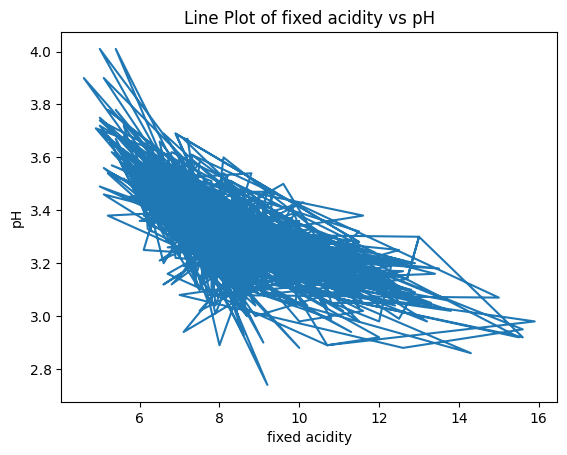

In [ ]:
# Line Plot
fig, ax = plt.subplots()
ax.plot(data["fixed acidity"], data["pH"])
ax.set_xlabel("fixed acidity")
ax.set_ylabel("pH")
ax.set_title("Line Plot of fixed acidity vs pH")
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter(data, x = "alcohol", y = "residual sugar", color = "pH", template="plotly_dark")
fig.show()

**Data Splitting into features as x and target values as y**

In [ ]:
from sklearn.model_selection import train_test_split
# Independent values - x, Dependent values - y
x = new_data.drop(columns = 'quality')
y = new_data['quality']

In [ ]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,4


In [ ]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1041, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

**Data Modellig using Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

RandomForestClassifier()

**Prediction of data using the model**

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([6, 5, 6, 6, 7, 6, 6, 6, 5, 6, 7, 7, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6,
       6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6,
       5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 7, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 7,
       5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6,
       5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6,
       6, 5, 6, 6, 6, 7, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6,
       6, 6, 6, 6, 5, 7, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 7, 6, 6, 5, 5,
       6, 6, 6, 5, 6, 6, 6, 5, 5, 7, 7, 5, 7, 5, 5, 6, 5, 5, 6, 5, 6, 7,
       5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 7, 5, 6, 5, 7, 7, 5, 5, 5, 6, 5, 5,
       6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification  # Example data generation

# Generate example data (replace with your actual data loading)
X, y = make_classification(n_samples=200, n_features=5, random_state=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=0)

# Ensure that X_train and X_test are numpy arrays (not necessary if already numpy arrays)
X_train = np.array(X_train)
X_test = np.array(X_test)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create the Random Forest Classifier model and fit it
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# Predict the test set results
y_pred = rf.predict(X_test)

# Print the first 5 predictions
print("First 5 predictions:", y_pred[:5])

First 5 predictions: [1 1 1 0 1]


**Data Evaluation on metrics**

**What is a Confusion Matrix?**
A confusion matrix is a matrix that summmarizes the performance of a machine learning model on a set of test data. It is a means of displaying the number of accurate and inaccurate instances based on the model's predictions. It is often used to measure the performance of classification models, which aim to predict a categorical label for each input instance.

In [ ]:
import sklearn
from sklearn import metrics
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", confusion_matrix)

Confusion Matrix: 
 [[65  7]
 [ 4 64]]


**Calculate the accuracy of the classifier**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Overall accuracy:", accuracy)

Overall accuracy: 0.9214285714285714


**Classification Report**
Accuracy, Precision, Recall and F1-Score for the dataset,
Macro Average and Weighted Average

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report: \n")
print(classification_report(y_test, y_pred))

Classification Report: 

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        72
           1       0.90      0.94      0.92        68

    accuracy                           0.92       140
   macro avg       0.92      0.92      0.92       140
weighted avg       0.92      0.92      0.92       140

